<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [73]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [74]:
# insert code here
import keras
import tensorflow as tf

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.15.0
Tensorflow version:  2.15.0


In [75]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [92]:
# insert code here
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import confusion_matrix

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.datasets import cifar10 
from keras.layers import MaxPool2D
from keras.layers import Dropout

## Check some data

In [93]:
# insert code here
(X_train_all,t_train_all) , (X_test_all,t_test_all) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
#train_images, test_images = train_images / 255.0, test_images / 255.0

In [94]:
size = 1000
X_train = X_train_all[:size,:,:,:]
t_train = t_train_all[:size,:]
X_test = X_test_all[:size,:,:,:]
t_test = t_test_all[:size,:]

In [95]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

In [133]:
#this function checks for 1 image 
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)

    l_id = label[id]
    print("Shape of actual:", actual.shape)
    print("Data at actual[id]:", actual[id])
    print("Shape of actual[id]:", actual[id].shape)
    print("l_id:", l_id, type(l_id))
    
    if (compare) and (actual is not None) and (np.argmax(l_id) != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (np.argmax(l_id), classes[np.argmax(l_id)], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (np.argmax(l_id), classes[np.argmax(l_id)]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [140]:
#this funtion checks for 10 images 
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]
        
        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (np.argmax(l_id) != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (np.argmax(l_id), classes[np.argmax(l_id)], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (np.argmax(l_id), classes[np.argmax(l_id)]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

Shape of actual: (1000, 10)
Data at actual[id]: [0 0 0 0 1 0 0 0 0 0]
Shape of actual[id]: (10,)
l_id: [1.4412911e-06 1.0804442e-04 4.6332733e-14 7.0043561e-11 4.5317448e-12
 6.0020950e-13 2.0432232e-10 9.2595914e-10 3.3763655e-07 9.9989021e-01] <class 'numpy.ndarray'>


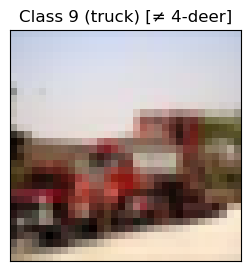

In [144]:
check_one(X_test,predictions, actual = y_test, compare = True)

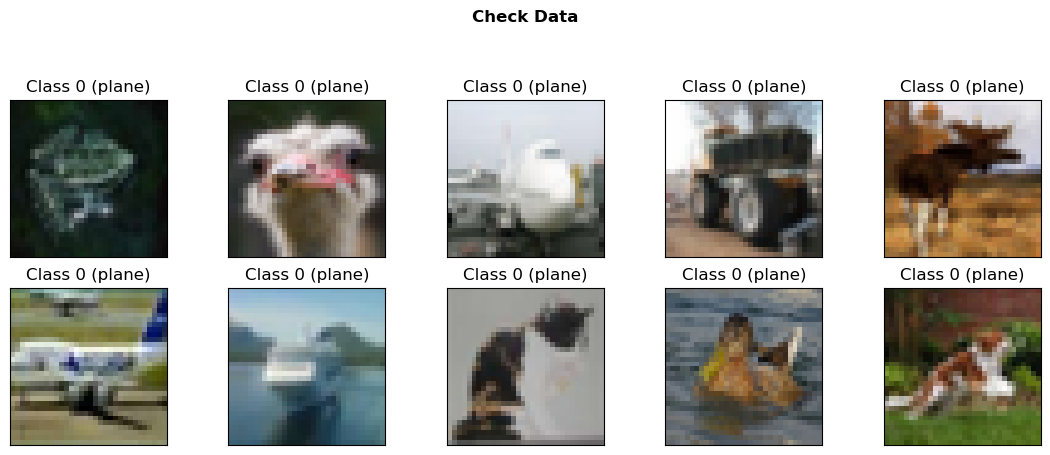

In [142]:
check_ten(X_train,t_train.flatten())

## Prepare data

In [99]:
t_train.shape

(1000, 1)

In [100]:
#flattening and addressing multi class codeing 

In [101]:
_,img_rows,img_cols,img_channels = X_train.shape

num_classes = len(set(t_train.flatten()))

y_train = to_categorical(
    t_train, 
    num_classes = num_classes,
    dtype = 'uint8')
y_test = to_categorical(
    t_train, 
    num_classes = num_classes,
    dtype = 'uint8')

In [102]:
t_train[0]

array([6], dtype=uint8)

In [103]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [104]:
num_classes

10

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [105]:
# insert code here
model = models.Sequential()
model.add(layers.Conv2D(48, kernel_size = 3, activation='relu', padding ='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(48, kernel_size = 3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
          
model.add(layers.Conv2D(96, kernel_size = 3, activation='relu', padding ='same'))
model.add(layers.Conv2D(96, kernel_size = 3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
          

model.add(layers.Conv2D(192, kernel_size = 3, activation='relu', padding ='same'))
model.add(layers.Conv2D(192, kernel_size = 3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
          

#dense layer 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

          
model.add(Dense(num_classes,activation='softmax'))

In [106]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 48)        1344      
                                                                 
 conv2d_49 (Conv2D)          (None, 30, 30, 48)        20784     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 48)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 15, 15, 48)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 15, 15, 96)        41568     
                                                                 
 conv2d_51 (Conv2D)          (None, 13, 13, 96)        83040     
                                                      

In [117]:
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])


## Compile the model

In [110]:
# insert code here #Let's display the architecture of your model so far
#above

## Fit the training data

In [125]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [128]:
%%time
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
        # epochs = 100,
    epochs = 100,
        # batch_size = 100,
    batch_size = 100,
    #callbacks = [tensorboard],
    verbose = 0)
print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')

Training accuracy:0.95 validation accuracy:0.41 
CPU times: total: 17min 53s
Wall time: 6min 49s


### TensorBoard
- TensorBoard is TensorFlow's visualization toolkit.
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [129]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 36204), started 1 day, 16:48:17 ago. (Use '!kill 36204' to kill it.)

## Create predictions

In [130]:
%%time
predictions = model.predict(X_test)

32/32 [==============================] - 2s 54ms/step
CPU times: total: 3.62 s
Wall time: 2.1 s


## Evaluate the model

## Visualization of cost

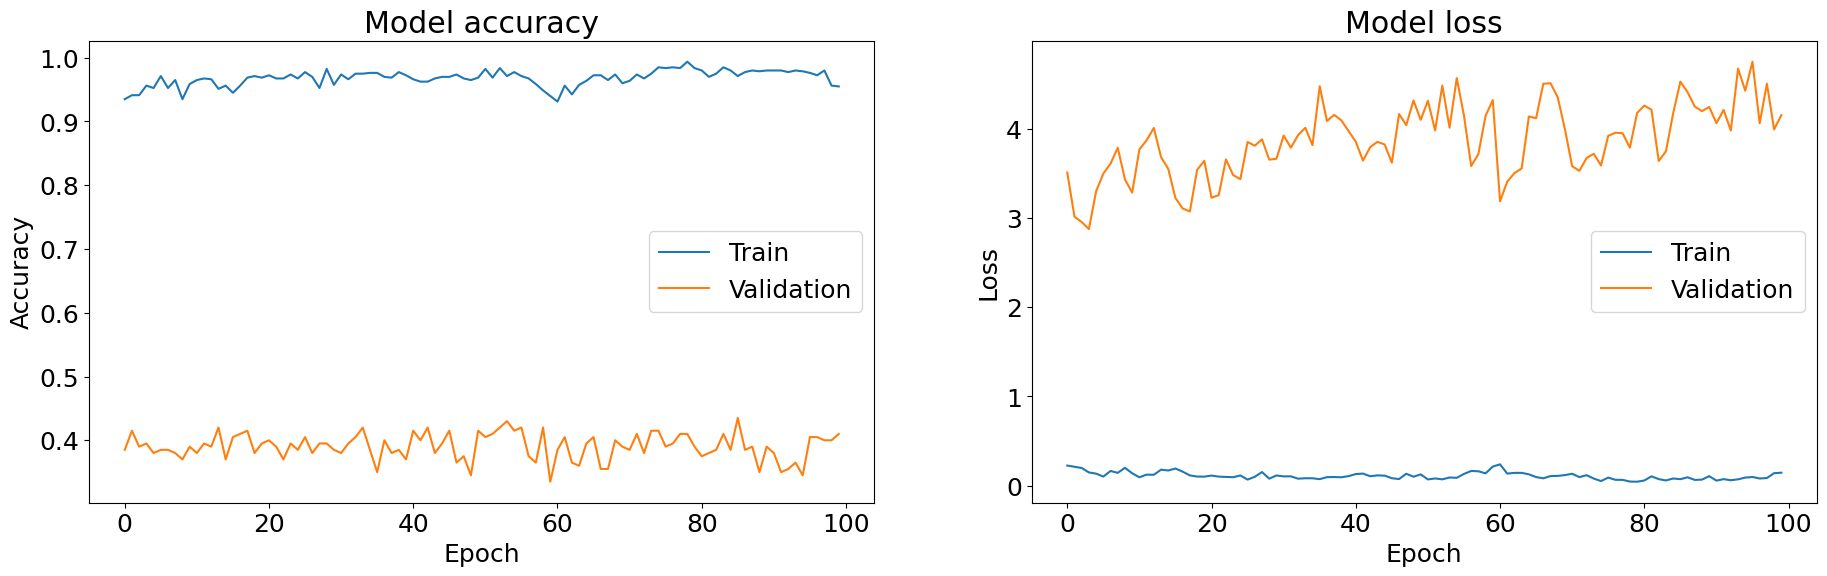

In [131]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

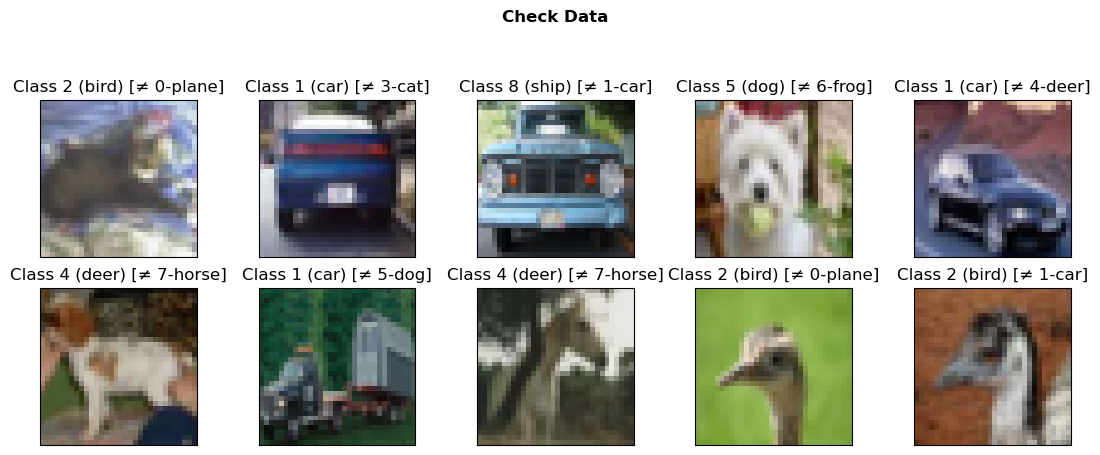

In [145]:
# insert code here

check_ten(X_test,predictions,actual=y_test,compare=True)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



